This practice set uses modified data from rows 3000-3099 of Sheet2.csv from Grant Brown and Logan Schmidt.

The set has been modified to remove any rows with empty author cells or cells which have more than one author.  Further research will need to be done to accomodate for these cells.  This is a practice for using real data with last week's methods and pinpointing possible issues.

In [2]:
#import necessary modules and rename them

import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#python command to display first lines of csv file
!head data100edited.csv

In [ ]:
# Create empty graph using networkx
G = nx.Graph()

In [ ]:
ga_edges=pd.read_csv("data100edited.csv", usecols=[3,4])

In [25]:
ga_edges

,Question,Answer
0,J.J. Sylvester,R. Townsend
1,R.W. Genese,R.W. Genese
2,R. Tucker,R. Tucker
3,J.J. Walker,J.J. Walker
4,R. Tucker,R. Tucker
5,A. Martin,A. Martin
6,A.W. Panton,G.M. Minchin
7,J. Blissard,J.J. Walker
8,W.K. Clifford,R. Townsend
9,W. Roberts,R. Townsend


In [26]:
#For now, making a new csv file.  In the future, this will not be suitable considering the amt of data.
ga_edges.to_csv("./file.csv", sep=',',index=False)

In [27]:
#create edges from the graph
edges = []
with open('file.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [28]:
edges

[['J.J. Sylvester', 'R. Townsend'],
 ['R.W. Genese', 'R.W. Genese'],
 ['R. Tucker', 'R. Tucker'],
 ['J.J. Walker', 'J.J. Walker'],
 ['R. Tucker', 'R. Tucker'],
 ['A. Martin', 'A. Martin'],
 ['A.W. Panton', 'G.M. Minchin'],
 ['J. Blissard', 'J.J. Walker'],
 ['W.K. Clifford', 'R. Townsend'],
 ['W. Roberts', 'R. Townsend'],
 ['A.B. Evans', 'R. Tucker'],
 ['S. Watson', 'Prof. Lampe'],
 ['G.M. Minchin', 'G.M. Minchin'],
 ['J. Wolstenholme', 'T.C. Simmons'],
 ['S. Roberts', 'S. Roberts'],
 ['R. Genese', 'R. Genese'],
 ['G.M. Minchin', 'G.M. Minchin'],
 ['W. Roberts', 'J.J. Walker'],
 ['C. Taylor', 'R.W. Genese'],
 ['S. Roberts', 'S. Roberts'],
 ['W.A. Whitworth', 'J. Wolstenholme'],
 ['E. Hill', 'H.'],
 ['J. Blissard', 'J. Blissard'],
 ['R.W. Genese', 'James Dale'],
 ['C. Taylor', 'J. Wolstenholme'],
 ['B.W. Horne', 'Morgan Jenkins'],
 ['J.J. Walker', 'J.A. McNeill'],
 ['James Matteson', 'D.S. Hart'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['C.W. Merrifield', 'C.W. Merrifield'],
 ['E. Hill', 'Ja

In [29]:
#create graph using networkx
GA = nx.from_edgelist(edges)

In [30]:
GA = nx.from_pandas_dataframe(ga_edges, source="Question", target="Answer")

In [31]:
#information about nodes and links
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 31
Number of edges: 29
Average degree:   1.8710


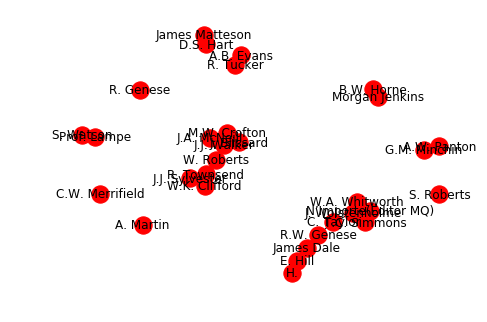

In [32]:
#draw the graph
nx.draw(GA, with_labels=True)

In [33]:
#For adjacency graph operations, will need to write code that parses both Question and Answer columns and
#adds each unique name to a new array.  Then need to go back through data and set a value of 1 if there is
#an edge betwen two names.

#start with adjacency matrixes...

ga_adj = pd.read_csv('../data/ga_adj.csv', index_col=0)

ga_adj.ix[0:5, 0:5]

FileNotFoundError: File b'../data/ga_adj.csv' does not exist

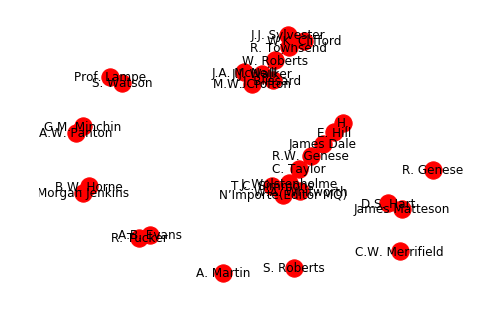

In [34]:
#save as a png with code!!
nx.draw(GA, with_labels=True)
plt.savefig("week2.png", format="PNG")

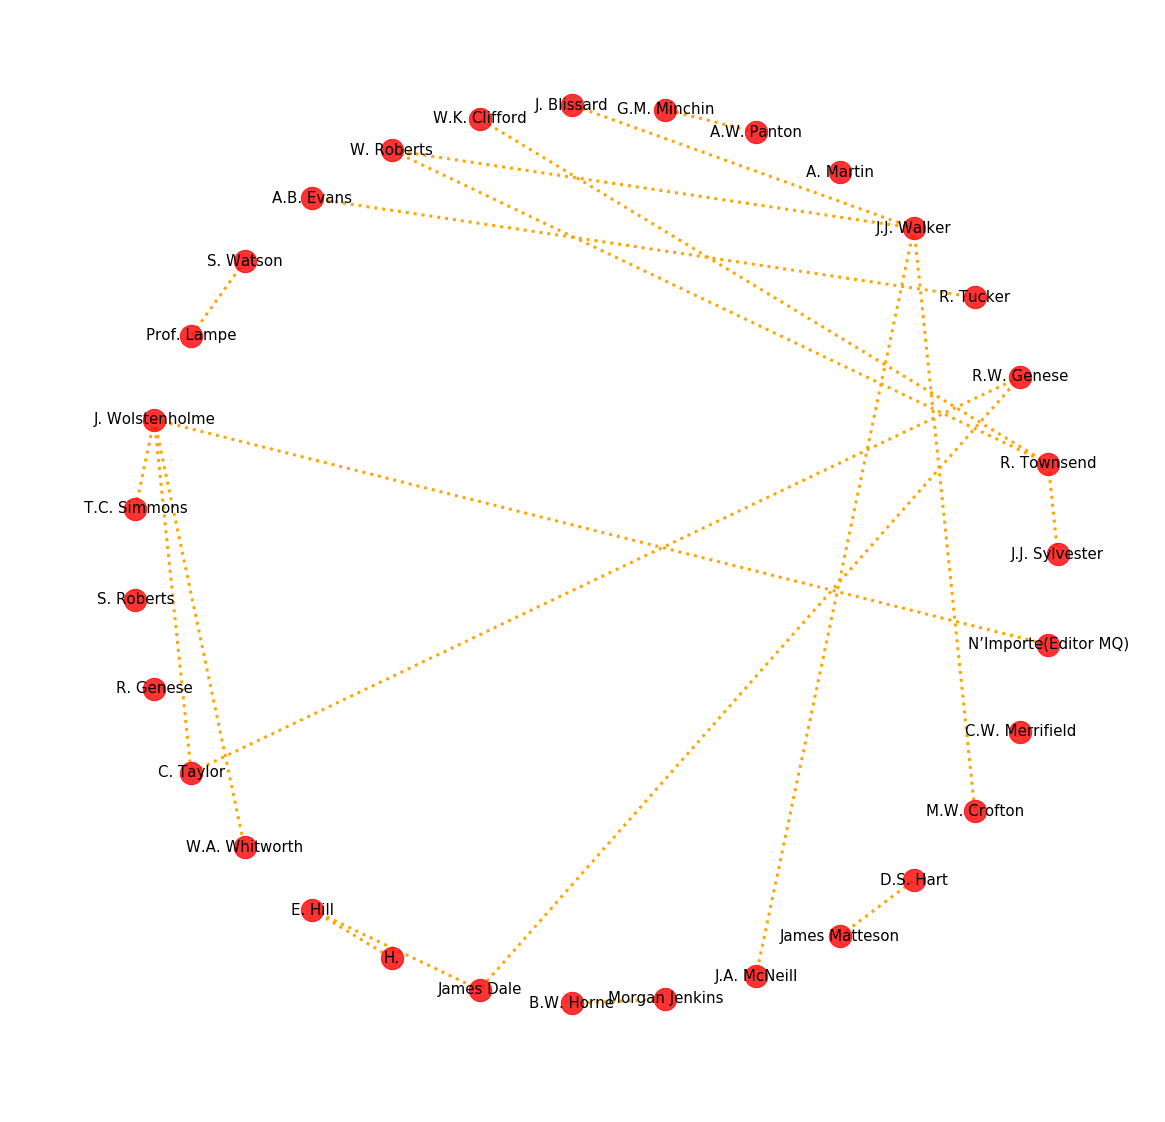

In [35]:
#this is where we can change the layout to be easier to read!
#layouts...

# Some matplotlib options
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

#plt.show()
plt.savefig("week2circular.png", format="PNG")

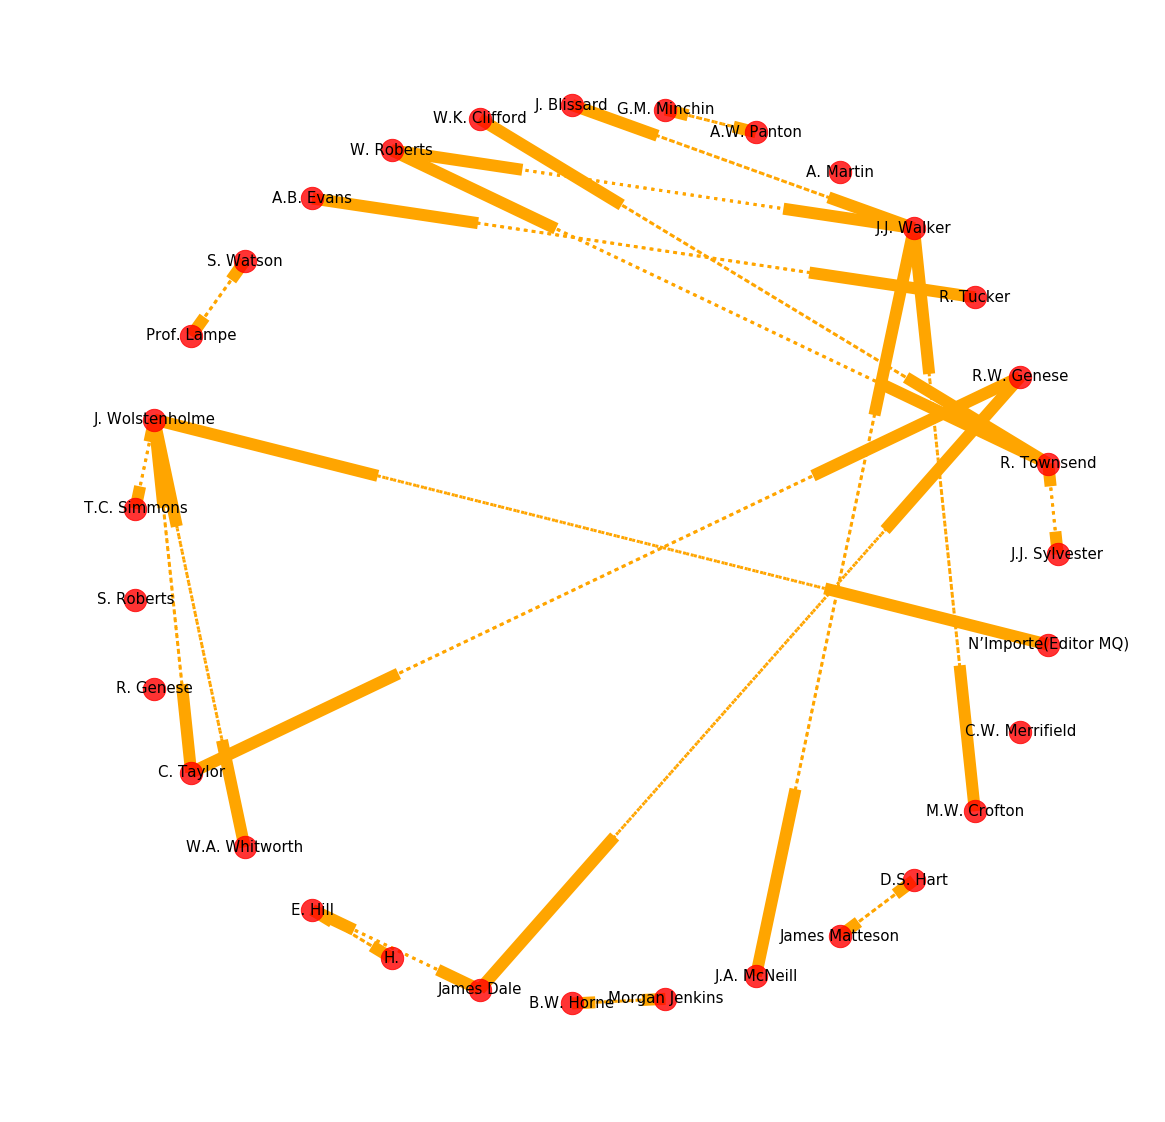

In [36]:
#need more information on how to implement these... looks like not really directed.
DGA=nx.DiGraph(GA)

plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(DGA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(DGA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(DGA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(DGA, pos=layout, font_size=15)

#plt.show()
plt.savefig("week2directed.png", format="PNG")

DEGREES

In [37]:
#number of edges connected to Whitworth
GA.degree("W.A. Whitworth")

1

In [38]:
GA.degree("J.J. Walker")

6

In [39]:
#print degrees of all nodes
GA.degree()

DegreeView({'J.J. Sylvester': 1, 'R. Townsend': 3, 'R.W. Genese': 4, 'R. Tucker': 3, 'J.J. Walker': 6, 'A. Martin': 2, 'A.W. Panton': 1, 'G.M. Minchin': 3, 'J. Blissard': 3, 'W.K. Clifford': 1, 'W. Roberts': 2, 'A.B. Evans': 1, 'S. Watson': 1, 'Prof. Lampe': 1, 'J. Wolstenholme': 4, 'T.C. Simmons': 1, 'S. Roberts': 2, 'R. Genese': 2, 'C. Taylor': 2, 'W.A. Whitworth': 1, 'E. Hill': 2, 'H.': 1, 'James Dale': 2, 'B.W. Horne': 1, 'Morgan Jenkins': 1, 'J.A. McNeill': 1, 'James Matteson': 1, 'D.S. Hart': 1, 'M.W. Crofton': 1, 'C.W. Merrifield': 2, 'N’Importe(Editor MQ)': 1})

In [40]:
sorted(GA.degree(), key=lambda x:x[1], reverse=True)[:5]

[('J.J. Walker', 6),
 ('R.W. Genese', 4),
 ('J. Wolstenholme', 4),
 ('R. Townsend', 3),
 ('R. Tucker', 3)]

In [41]:
#sorted degrees
sorted(GA.degree(), key=lambda x:x[1], reverse=True)

[('J.J. Walker', 6),
 ('R.W. Genese', 4),
 ('J. Wolstenholme', 4),
 ('R. Townsend', 3),
 ('R. Tucker', 3),
 ('G.M. Minchin', 3),
 ('J. Blissard', 3),
 ('A. Martin', 2),
 ('W. Roberts', 2),
 ('S. Roberts', 2),
 ('R. Genese', 2),
 ('C. Taylor', 2),
 ('E. Hill', 2),
 ('James Dale', 2),
 ('C.W. Merrifield', 2),
 ('J.J. Sylvester', 1),
 ('A.W. Panton', 1),
 ('W.K. Clifford', 1),
 ('A.B. Evans', 1),
 ('S. Watson', 1),
 ('Prof. Lampe', 1),
 ('T.C. Simmons', 1),
 ('W.A. Whitworth', 1),
 ('H.', 1),
 ('B.W. Horne', 1),
 ('Morgan Jenkins', 1),
 ('J.A. McNeill', 1),
 ('James Matteson', 1),
 ('D.S. Hart', 1),
 ('M.W. Crofton', 1),
 ('N’Importe(Editor MQ)', 1)]

DEGREE CENTRALITY

In [42]:
# Degree for the Walkernode
degree_walker = GA.degree("J.J. Walker")  # 4 romantic partners

# Total number of nodes (excluding Walker) 
total_nodes_minus_walker = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Walker
degree_centrality_walker = (degree_walker / total_nodes_minus_walker)
print("Calculated degree centrality for J.J. Walker:", degree_centrality_walker)

# Double check
print("Networkx degree centrality for J.J. Walker:", nx.degree_centrality(GA)["J.J. Walker"])

def check_equal(val1, val2):
    assert (val1 == val2),"Centrality measure calculated incorrectly!"
    return "Values match, good job!"

check_equal(degree_centrality_walker, nx.degree_centrality(GA)["J.J. Walker"])

Calculated degree centrality for J.J. Walker: 0.2
Networkx degree centrality for J.J. Walker: 0.2


'Values match, good job!'

In [43]:
degree_centrality = nx.degree_centrality(GA)
degree_centrality

{'A. Martin': 0.06666666666666667,
 'A.B. Evans': 0.03333333333333333,
 'A.W. Panton': 0.03333333333333333,
 'B.W. Horne': 0.03333333333333333,
 'C. Taylor': 0.06666666666666667,
 'C.W. Merrifield': 0.06666666666666667,
 'D.S. Hart': 0.03333333333333333,
 'E. Hill': 0.06666666666666667,
 'G.M. Minchin': 0.1,
 'H.': 0.03333333333333333,
 'J. Blissard': 0.1,
 'J. Wolstenholme': 0.13333333333333333,
 'J.A. McNeill': 0.03333333333333333,
 'J.J. Sylvester': 0.03333333333333333,
 'J.J. Walker': 0.2,
 'James Dale': 0.06666666666666667,
 'James Matteson': 0.03333333333333333,
 'M.W. Crofton': 0.03333333333333333,
 'Morgan Jenkins': 0.03333333333333333,
 'N’Importe(Editor MQ)': 0.03333333333333333,
 'Prof. Lampe': 0.03333333333333333,
 'R. Genese': 0.06666666666666667,
 'R. Townsend': 0.1,
 'R. Tucker': 0.1,
 'R.W. Genese': 0.13333333333333333,
 'S. Roberts': 0.06666666666666667,
 'S. Watson': 0.03333333333333333,
 'T.C. Simmons': 0.03333333333333333,
 'W. Roberts': 0.06666666666666667,
 'W.A. 

In [44]:
# Top 5
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('J.J. Walker', 0.2),
 ('R.W. Genese', 0.13333333333333333),
 ('J. Wolstenholme', 0.13333333333333333),
 ('R. Townsend', 0.1),
 ('R. Tucker', 0.1)]

In [45]:
# apply measurements back to Graph
nx.set_node_attributes(GA, degree_centrality, 'degree centrality')

In [46]:
GA.node['J.J. Walker']

{'degree centrality': 0.2}

In [48]:
# Shortest path between Walker and others
walker_shortest_path = nx.shortest_path_length(GA,'J.J. Walker')
walker_shortest_path

{'J. Blissard': 1,
 'J.A. McNeill': 1,
 'J.J. Sylvester': 3,
 'J.J. Walker': 0,
 'M.W. Crofton': 1,
 'R. Townsend': 2,
 'W. Roberts': 1,
 'W.K. Clifford': 3}

CLOSENESS CENTRALITY

In [49]:
# Sum of the shortest paths to all other characters
walker_sum_shortest_path = sum(walker_shortest_path.values())  # 77

# Closeness centrality for Walker
closeness_centrality_walker = (total_nodes_minus_walker / walker_sum_shortest_path)
print("Calculated closeness centrality for Walker:", closeness_centrality_walker)

# Double check
print("Networkx closeness centrality for Walker:", nx.closeness_centrality(GA)["J.J. Walker"])

check_equal(closeness_centrality_walker, nx.closeness_centrality(GA)["J.J. Walker"])

Calculated closeness centrality for Walker: 2.5
Networkx closeness centrality for Walker: 0.13611111111111113


AssertionError: Centrality measure calculated incorrectly!

In [50]:
# View members of different subgraphs
sorted(nx.connected_components(GA), key = len, reverse=True)

[{'C. Taylor',
  'E. Hill',
  'H.',
  'J. Wolstenholme',
  'James Dale',
  'N’Importe(Editor MQ)',
  'R.W. Genese',
  'T.C. Simmons',
  'W.A. Whitworth'},
 {'J. Blissard',
  'J.A. McNeill',
  'J.J. Sylvester',
  'J.J. Walker',
  'M.W. Crofton',
  'R. Townsend',
  'W. Roberts',
  'W.K. Clifford'},
 {'A.B. Evans', 'R. Tucker'},
 {'A.W. Panton', 'G.M. Minchin'},
 {'Prof. Lampe', 'S. Watson'},
 {'B.W. Horne', 'Morgan Jenkins'},
 {'D.S. Hart', 'James Matteson'},
 {'A. Martin'},
 {'S. Roberts'},
 {'R. Genese'},
 {'C.W. Merrifield'}]

In [52]:
# Number of nodes in Walker subgraph, excluding Walker
total_nodes_minus_walker_sub = len(walker_shortest_path)-1   # 23

# Closeness centrality for Walker (unnormalized)
closeness_centrality_walker = (total_nodes_minus_walker_sub / walker_sum_shortest_path)   # ~0.2987

# Closeness centrality for Walker (normalized)
closeness_centrality_walker_normalized = closeness_centrality_walker * (total_nodes_minus_walker_sub/total_nodes_minus_walker)
print("Calculated closeness centrality for Walker (normalized):", closeness_centrality_walker_normalized)

# Double check
print("Networkx closeness centrality for Walker:", nx.closeness_centrality(GA)["J.J. Walker"])

check_equal(closeness_centrality_walker_normalized, nx.closeness_centrality(GA)["J.J. Walker"])

Calculated closeness centrality for Walker (normalized): 0.13611111111111113
Networkx closeness centrality for Walker: 0.13611111111111113


'Values match, good job!'

In [53]:
closeness_centrality = nx.closeness_centrality(GA)
closeness_centrality

{'A. Martin': 0.0,
 'A.B. Evans': 0.03333333333333333,
 'A.W. Panton': 0.03333333333333333,
 'B.W. Horne': 0.03333333333333333,
 'C. Taylor': 0.12549019607843137,
 'C.W. Merrifield': 0.0,
 'D.S. Hart': 0.03333333333333333,
 'E. Hill': 0.08205128205128205,
 'G.M. Minchin': 0.03333333333333333,
 'H.': 0.06464646464646465,
 'J. Blissard': 0.09074074074074075,
 'J. Wolstenholme': 0.11851851851851851,
 'J.A. McNeill': 0.09074074074074075,
 'J.J. Sylvester': 0.08166666666666667,
 'J.J. Walker': 0.13611111111111113,
 'James Dale': 0.10158730158730157,
 'James Matteson': 0.03333333333333333,
 'M.W. Crofton': 0.09074074074074075,
 'Morgan Jenkins': 0.03333333333333333,
 'N’Importe(Editor MQ)': 0.08533333333333333,
 'Prof. Lampe': 0.03333333333333333,
 'R. Genese': 0.0,
 'R. Townsend': 0.11666666666666667,
 'R. Tucker': 0.03333333333333333,
 'R.W. Genese': 0.11851851851851851,
 'S. Roberts': 0.0,
 'S. Watson': 0.03333333333333333,
 'T.C. Simmons': 0.08533333333333333,
 'W. Roberts': 0.1361111111

In [54]:
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('J.J. Walker', 0.13611111111111113),
 ('W. Roberts', 0.13611111111111113),
 ('C. Taylor', 0.12549019607843137),
 ('R.W. Genese', 0.11851851851851851),
 ('J. Wolstenholme', 0.11851851851851851)]

In [55]:
# apply measurements back to Graph
nx.set_node_attributes(GA, closeness_centrality, 'closeness centrality')

In [56]:
# average distance of Taylor:
1 / closeness_centrality['C. Taylor']

7.96875

In [57]:
7/(len(GA.nodes()) - 1)

0.23333333333333334

BETWEENNESS CENTRALITY

In [58]:
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

{'A. Martin': 0.0,
 'A.B. Evans': 0.0,
 'A.W. Panton': 0.0,
 'B.W. Horne': 0.0,
 'C. Taylor': 0.0367816091954023,
 'C.W. Merrifield': 0.0,
 'D.S. Hart': 0.0,
 'E. Hill': 0.016091954022988506,
 'G.M. Minchin': 0.0,
 'H.': 0.0,
 'J. Blissard': 0.0,
 'J. Wolstenholme': 0.041379310344827586,
 'J.A. McNeill': 0.0,
 'J.J. Sylvester': 0.0,
 'J.J. Walker': 0.034482758620689655,
 'James Dale': 0.027586206896551724,
 'James Matteson': 0.0,
 'M.W. Crofton': 0.0,
 'Morgan Jenkins': 0.0,
 'N’Importe(Editor MQ)': 0.0,
 'Prof. Lampe': 0.0,
 'R. Genese': 0.0,
 'R. Townsend': 0.02528735632183908,
 'R. Tucker': 0.0,
 'R.W. Genese': 0.034482758620689655,
 'S. Roberts': 0.0,
 'S. Watson': 0.0,
 'T.C. Simmons': 0.0,
 'W. Roberts': 0.027586206896551724,
 'W.A. Whitworth': 0.0,
 'W.K. Clifford': 0.0}

In [59]:
# top 5
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('J. Wolstenholme', 0.041379310344827586),
 ('C. Taylor', 0.0367816091954023),
 ('R.W. Genese', 0.034482758620689655),
 ('J.J. Walker', 0.034482758620689655),
 ('W. Roberts', 0.027586206896551724)]

EIGENVECTOR CENTRALITY

In [60]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

{'A. Martin': -2.7755575615628914e-17,
 'A.B. Evans': -0.0,
 'A.W. Panton': 2.7755575615628914e-16,
 'B.W. Horne': -0.0,
 'C. Taylor': -1.4224732503009818e-15,
 'C.W. Merrifield': 1.1102230246251565e-16,
 'D.S. Hart': -2.7755575615628914e-17,
 'E. Hill': -6.106226635438361e-16,
 'G.M. Minchin': 2.3592239273284576e-16,
 'H.': -5.2735593669694936e-16,
 'J. Blissard': 0.42088667304830962,
 'J. Wolstenholme': -9.4368957093138306e-16,
 'J.A. McNeill': 0.26759714054324807,
 'J.J. Sylvester': 0.058956979751301028,
 'J.J. Walker': 0.73474077688096351,
 'James Dale': -1.5820678100908481e-15,
 'James Matteson': -2.0816681711721685e-17,
 'M.W. Crofton': 0.26759714054324812,
 'Morgan Jenkins': -0.0,
 'N’Importe(Editor MQ)': -4.163336342344337e-16,
 'Prof. Lampe': -0.0,
 'R. Genese': -6.9388939039072284e-18,
 'R. Townsend': 0.16187802686189434,
 'R. Tucker': -2.7755575615628914e-16,
 'R.W. Genese': -1.9428902930940239e-15,
 'S. Roberts': -5.5511151231257827e-17,
 'S. Watson': -8.3266726846886741e-1

In [62]:
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]

sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]

[('J.J. Walker', 1.0),
 ('J. Blissard', 0.57283696004325357),
 ('W. Roberts', 0.44444807008098675),
 ('M.W. Crofton', 0.36420619212019312),
 ('J.A. McNeill', 0.36420619212019301)]

COMMUNITY DEVELOPMENT

In [63]:
from networkx.algorithms.community import k_clique_communities, girvan_newman

In [64]:
gn_comm = girvan_newman(GA)

In [65]:
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))

In [66]:
dict(enumerate(first_iteration_comm))

{0: ['J. Blissard',
  'J.A. McNeill',
  'J.J. Sylvester',
  'J.J. Walker',
  'M.W. Crofton',
  'R. Townsend',
  'W. Roberts',
  'W.K. Clifford'],
 1: ['E. Hill', 'H.', 'James Dale', 'R.W. Genese'],
 2: ['A.B. Evans', 'R. Tucker'],
 3: ['A. Martin'],
 4: ['A.W. Panton', 'G.M. Minchin'],
 5: ['Prof. Lampe', 'S. Watson'],
 6: ['C. Taylor',
  'J. Wolstenholme',
  'N’Importe(Editor MQ)',
  'T.C. Simmons',
  'W.A. Whitworth'],
 7: ['S. Roberts'],
 8: ['R. Genese'],
 9: ['B.W. Horne', 'Morgan Jenkins'],
 10: ['D.S. Hart', 'James Matteson'],
 11: ['C.W. Merrifield']}

In [67]:
def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [68]:
from helpers import create_color_map

In [69]:
community_map = map_communities(GA, first_iteration_comm)

nx.set_node_attributes(GA, community_map, 'community')

node_colors, color_map, palette = create_color_map(GA, 'community')

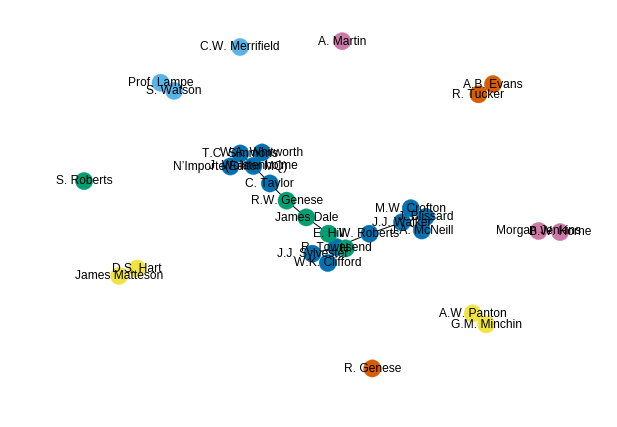

In [70]:
nx.draw(GA, node_color=node_colors, with_labels=True)
plt.savefig("week2community.png", format="PNG")

In [71]:
second_comm = tuple(sorted(c) for c in next(gn_comm))

community_map_2 = map_communities(GA, second_comm)

nx.set_node_attributes(GA, community_map_2, 'community two')

node_colors, color_map, palette = create_color_map(GA, 'community two')

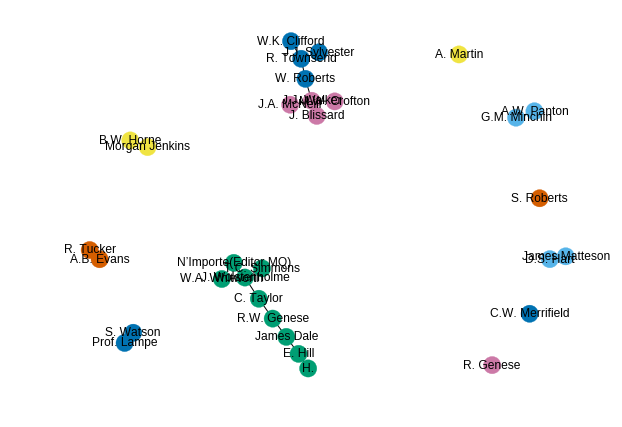

In [72]:
nx.draw(GA, node_color=node_colors, with_labels=True)
plt.savefig("week2community2.png", format="PNG")

K-CLIQUE COMMUNITIES

In [73]:
k_clique = k_clique_communities(GA, 2)

In [74]:
dict(enumerate(k_clique))

{0: frozenset({'D.S. Hart', 'James Matteson'}),
 1: frozenset({'B.W. Horne', 'Morgan Jenkins'}),
 2: frozenset({'C. Taylor',
            'E. Hill',
            'H.',
            'J. Wolstenholme',
            'James Dale',
            'N’Importe(Editor MQ)',
            'R.W. Genese',
            'T.C. Simmons',
            'W.A. Whitworth'}),
 3: frozenset({'A.B. Evans', 'R. Tucker'}),
 4: frozenset({'Prof. Lampe', 'S. Watson'}),
 5: frozenset({'J. Blissard',
            'J.A. McNeill',
            'J.J. Sylvester',
            'J.J. Walker',
            'M.W. Crofton',
            'R. Townsend',
            'W. Roberts',
            'W.K. Clifford'}),
 6: frozenset({'A.W. Panton', 'G.M. Minchin'})}

In [75]:
k_clique = k_clique_communities(GA, 3)
dict(enumerate(k_clique))

{}

In [76]:
print("Percent of ALL edges that could exist: %0.2f" % (nx.density(GA) * 100))

Percent of ALL edges that could exist: 6.24


ZACHARYS KARATE CLUB

In [77]:
Karate = nx.karate_club_graph()

In [78]:
gn_comm = girvan_newman(Karate)

first_comm = tuple(sorted(c) for c in next(gn_comm))

community_map = map_communities(Karate, first_comm)

nx.set_node_attributes(Karate, community_map, 'community gn')

node_colors, color_map, palette = create_color_map(Karate, 'community gn')

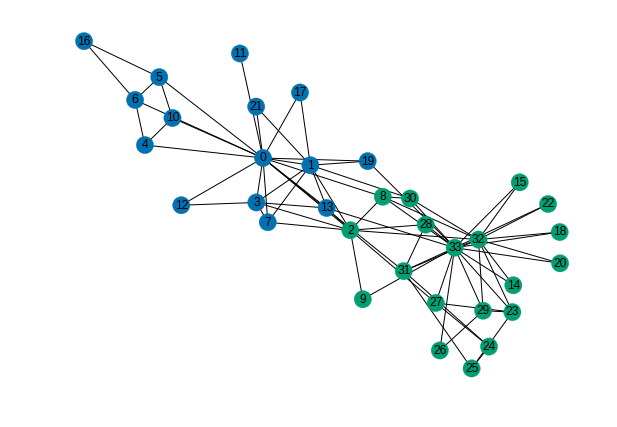

In [79]:
nx.draw(Karate, node_color=node_colors, with_labels=True)
plt.savefig("week2karate.png", format="PNG")

In [80]:
k_clique = k_clique_communities(Karate, 3)

k_clique_comm = [list(community) for community in k_clique]

community_map = map_communities(Karate, k_clique_comm)

nx.set_node_attributes(Karate, community_map, 'community k-clique')

node_colors, color_map, palette = create_color_map(Karate, 'community k-clique')

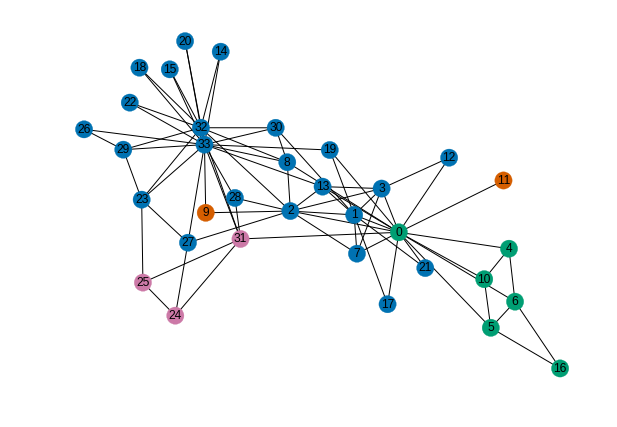

In [81]:
nx.draw(Karate, node_color=node_colors, with_labels=True)
plt.savefig("week2karate2.png", format="PNG")

In [82]:
club_community = [Karate.node[node] for node in Karate.nodes()]

club_df = pd.DataFrame(club_community)

In [83]:
pd.crosstab(club_df['club'], club_df['community gn'])

community gn,0,1
club,,
Mr. Hi,15,2
Officer,0,17


In [84]:
pd.crosstab(club_df['club'], club_df['community k-clique'])

community k-clique,0.0,1.0,2.0
club,,,
Mr. Hi,10,6,0
Officer,13,0,3
